# **Fulton Fish Market, NY (Graddy 1995)**

#### Consumer fish markets are generally highly competitive markets. We will look at a dataset from whiting fish market. Whiting fish markets are interesting to study for a variety of reasons - First, more transactions take place in whiting than almost any other first. Second, whiting do not vary as much in size and quality as other fish. The Fulton fish market has no posted prices and each dealer is free to charge a different price to each customer. If a customer wished to buy a particular quantity of fish, he/she would ask a seller for the price. The seller would quote a price and the customer would usually either buy the fish or walk away. Our study uses data from a 1995 research by Graddy, available in a file called fulton.csv. This file has information from 111 different days, ranging from December 2, 1991 to May 8, 1992. There are 8 different kinds of information (variables) in the dataset that we will look into.




---



| Variable Name | Description |
| :------- | :------- |
| Mon  | Variable is set to 1 if the day is Monday otherwise 0  |
| Tue  | Variable is set to 1 if the day is Tuesday otherwise 0  |
| Wed  | Variable is set to 1 if the day is Wednesday otherwise 0  |
| Thu  | Variable is set to 1 if the day is Thursday otherwise 0  |
| Date  | Date of transaction  |
| Stormy  | Variable is set to 1 if it was stormy two days ago  |
| p  | Variable represents log[prices] + 2, where prices represent the average transaction price of whiting on the given date  |
| q  | Variable represents the quantity of whiting sold on the given date  |




---



### **1. Let us start by exploring the data.**

**a) First, create two scatterplots - First one with putting prices (p) on the y axis and the Date on x-axis, Second with the quantity (q) on the y axis and the Date on the x-axis. What do you conclude regarding variation in prices?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('fulton.csv')

print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

print(df.info())

| Mon   | Tue   | Wed   | Thu   | Date   | Stormy   | p       | q       |
|:------|:------|:------|:------|:-------|:---------|:--------|:--------|
| 1     | 0     | 0     | 0     | 1      | 1        | 1.56922 | 8.99442 |
| 0     | 1     | 0     | 0     | 2      | 1        | 2       | 7.70706 |
| 0     | 0     | 1     | 0     | 3      | 0        | 2.07232 | 8.35019 |
| 0     | 0     | 0     | 1     | 4      | 1        | 2.24714 | 8.65695 |
| 0     | 0     | 0     | 0     | 5      | 1        | 2.66433 | 7.84424 |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     111 non-null    int64  
 1   Tue     111 non-null    int64  
 2   Wed     111 non-null    int64  
 3   Thu     111 non-null    int64  
 4   Date    111 non-null    int64  
 5   Stormy  111 non-null    int64  
 6   p       111 non-null    float64
 7   q       111 non-null    float64
dtypes: 

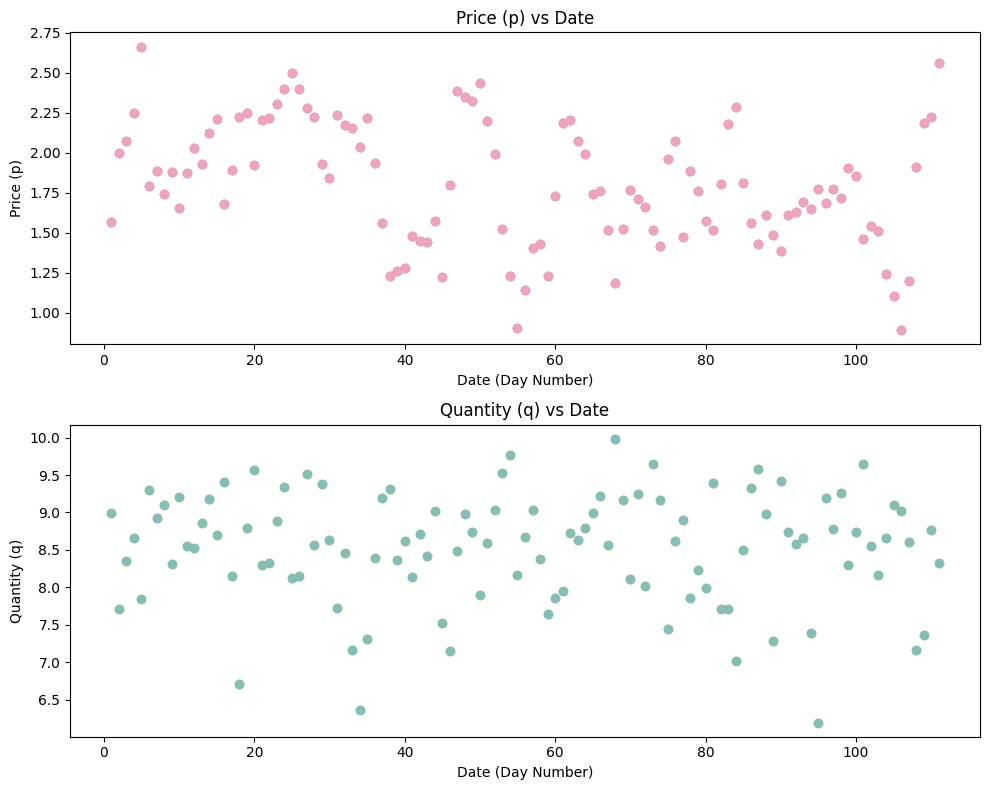

In [2]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Scatterplot 1: Price vs Date
ax1.scatter(df['Date'], df['p'], alpha=0.7)
ax1.set_title('Price (p) vs Date')
ax1.set_xlabel('Date (Day Number)')
ax1.set_ylabel('Price (p)')
ax1.scatter(df['Date'], df['p'], c='#F2A2BD')
# featuring Glinda coloring :)

# Scatterplot 2: Quantity vs Date
ax2.scatter(df['Date'], df['q'], color='orange', alpha=0.7)
ax2.set_title('Quantity (q) vs Date')
ax2.set_xlabel('Date (Day Number)')
ax2.set_ylabel('Quantity (q)')
ax2.scatter(df['Date'], df['q'], c='#82BFB7')
# featuring Elphaba coloring :)

plt.tight_layout()

plt.savefig('scatterplots.png')

Based on the first scatterplot (Price vs. Date), we can observe that prices vary significantly over time. They do not remain constant and fluctuate from day to day across the 111-day period. This volatility is consistent with the description of the Fulton Fish Market as a competitive market where dealers charge different prices to different customers, likely responding to daily changes in supply and demand.

---



**b) What is the average price (p) and quantity (q) of fish sold on each weekday (Mon-Thu)? On which day are fish sold for highest price? Can you provide any potential explanation for that.**

In [3]:
days = ['Mon', 'Tue', 'Wed', 'Thu']
results = {}

for day in days:
    day_data = df[df[day] == 1]
    avg_p = day_data['p'].mean()
    avg_q = day_data['q'].mean()
    results[day] = {'avg_p': avg_p, 'avg_q': avg_q}

friday_data = df[(df['Mon'] == 0) & (df['Tue'] == 0) & (df['Wed'] == 0) & (df['Thu'] == 0)]
if not friday_data.empty:
    results['Fri'] = {'avg_p': friday_data['p'].mean(), 'avg_q': friday_data['q'].mean()}

results_df = pd.DataFrame(results).T
print(results_df)

highest_price_day = results_df['avg_p'].idxmax()
print(f"Day with highest price: {highest_price_day}")

        avg_p     avg_q
Mon  1.747336  8.763345
Tue  1.792573  8.207339
Wed  1.798947  8.164622
Thu  1.868307  8.762598
Fri  1.818661  8.708905
Day with highest price: Thu


The average price (p) and quantity (q) for fish sold on each weekday is as follows [assuming that if the day is defined as Friday if all of the defined weekdays are set to 0]:

| Day | Average Price (p) | Average Quantity (q) |
| :------- | :------: | :-------: |
| Mon  | 1.747 | 8.763 |
| Tue  | 1.793 | 8.207 |
| Wed  | 1.799 | 8.165 |
| Thu  | 1.868 | 8.763 |
| "Fri"  | 1.819 | 8.709 |

Fish are being sold for the highest price on Thursday with an average price of 1.868.

The higher price on Thursdays could be due to increased demand from buyers stocking up for the weekend. Since Friday and Saturday tend to be high-volume days for seafood consumption in restaurants and retail markets, buyers may be willing to pay a higher premium on Thursdays in order to ensure they have enough fresh inventory. Interestingly, the quantity sold on Thursdays is also high (as well as on Mondays and Fridays), which supports the idea of strong demand driving up both price and volume.

---



### **2. Build a linear regression model to predict quantity (q), using all of the other variables (except the "Stormy" and "Date" variable).**

**a) What is the linear regression equation produced by your model?**

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'q ~ Mon + Tue + Wed + Thu + p'

model = ols(formula, data=df).fit()

print(model.summary().as_text())

intercept = model.params['Intercept']
mon_coeff = model.params['Mon']
tue_coeff = model.params['Tue']
wed_coeff = model.params['Wed']
thu_coeff = model.params['Thu']
p_coeff = model.params['p']

coefficients = {
    'Intercept': intercept,
    'Mon': mon_coeff,
    'Tue': tue_coeff,
    'Wed': wed_coeff,
    'Thu': thu_coeff,
    'p': p_coeff
}

print("\nCoefficients for equation:", coefficients)

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.940
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           7.08e-05
Time:                        01:29:36   Log-Likelihood:                -110.00
No. Observations:                 111   AIC:                             232.0
Df Residuals:                     105   BIC:                             248.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7320      0.336     28.936      0.0

The linear regression equation is:
$$\hat{q} = 9.732 - 0.563 \cdot p + 0.014 \cdot \text{Mon} - 0.516 \cdot \text{Tue} - 0.555 \cdot \text{Wed} + 0.082 \cdot \text{Thu}$$


Given the values in this table:
| Variable | Coefficent ($\beta$) |
| :------- | :------: |
| Intercept  | 9.732 |
| Price (p)  | -0.563 |
| Mon  | 0.014 |
| Tue  | -0.516 |
| Wed  | -0.555 |
| Thu  | 0.082 |

---

**b) Evaluate the quality of your model. What is the R^2 value? Which independent variables are significant?**

The model as a whole is statistically significant with a Prob (F-statistic) of 7.08e-05 or 0.0000708, meaning the predictors collectively help explain the quantity sold. However, since the R^2 for my model is 0.220 shown in the OLS Regression Results table, the model has only a moderate explanatory power. The model successfully captures the significant negative relationship between price and quantity, which is expected for a demand curve, as well as significant differences in quantity sold on Tuesdays and Wednesdays compared to the reference day (Friday, assumming Mon, Tue, Wed, and Thu are all equal to 0).

This means that approximately 22.0% of the variation in the quantity (q) of fish sold is explained by the independent variables included in the model (Mon, Tue, Wed, Thu, and p). Since the R^2 value is relatively low, it suggests that there are other factors that are not included in the model that influence the quantity of fish sold.

Using a common significance level of $\alpha = 0.05$ to determine statistical significance (where the P-value, $\text{P}>|\text{t}|$, is less than $0.05$), the statistically significant variables are:

* Price (p): P-value = 0.001
* Tuesday (Tue): P-value = 0.010
* Wednesday (Wed): P-value = 0.007

(Monday [Mon]: P-value = 0.944 and Thursday [Thu]: P-value = 0.681 are not statistically signifcant for this model.)


---



**c) What is the coefficient of price (p)? Can we use this coefficient to estimate the effect of change in prices on quantity (q)? Explain your reasoning.**

The coefficient of price (p) is -0.5625 as shown in  the OLS Regression Results table.

We cannot reliably use this coefficient to estimate the true causal effect of a change in prices on quantity sold for three reasons.

Firstly, simultaneous determination, in a competitive market like the Fulton Fish Market, price (p) and quantity (q) are determined simultaneously by the intersection of both the demand curve (which dictates how much consumers want) and the supply curve (which dictates how much sellers offer).

Secondly, correlation with the error term, the OLS Regression Results table only estimates the relationship between q and its predictors (including p). However, the error term captures all unobserved factors affecting quantity, such as supply shocks that shift the supply curve. Since these unobserved factors in the error also affect the price (p), the correlation between p and the error term violates a key assumption of OLS, the assumption of exogeneity.

Lastly, bias in estimate, because of this violation, the OLS estimate of the price coefficient is biased and inconsistent. The OLS estimate does not isolate the pure effect of price on quantity and instead mixes the influences of both demand and supply, leading to an unreliable estimate of the causal relationship.

In order to obtain an unbiased estimate of the demand slope, you must typically employ techniques like Instrumental Variable or IV regression.


---



### **3. Let us now look at estimating the causal effect of price (p) on quantity (q).**

**a) Graddy (1995) proposed the use of two-day lagged weather as an instrument for prices (p). Justify why this could be a good instrument. (Note an instrument needs to satisfy two properties.)**

The use of a two-day lagged weather (Stormy) as an Instrumental Variable (IV) for price (p) is proposed because it seems to satisfy the two key properties required for a valid instrument which are relevance and exclusion restriction.

As far as relevance, the instrument (Stormy) must be correlated with the endogenous variable (p). Generally, a storm at sea two days prior would directly impact the ability of fishing boats to go out and fish. A "stormy" event would therefore cause a decrease in the supply of fish brought to the market two days later. Reduced supply on the market day generally leads to higher average prices. Thus, the two-day lagged stormy weather is expected to have a significant, positive correlation with the current day's price.

For exclusion restriction, the instrument (Stormy) must be uncorrelated with the error term in the primary equation. This means that it must affect the quantity (q) sold *only* through its effect on the price (p). The primary factors captured by the error term are unobserved determinants of demand and supply on the current day. Since the data for weather has a two-day lag it would be assumed that this data should not affect the actual supply decisions made by dealers once the fish is already at the market or the consumer demand since customers tend to buy fish based on the current day's price, personal tastes, and current market conditions and not on storms in the past few days.

By satisfying these two demands of relevance and exclusion restriction properties, the two-day lagged weather variable would be able to serve as an effective instrument to identify the causal effect of price on quantity (the demand curve), solving the endogeneity issue faced by OLS (in the previous question).


---



**b) Is there any way in which this instrument could correlate directly with the quantity of fish sold on a day. If yes explain how?**

Yes, there is a potential way in which the two-day lagged weather variable (Stormy) could violate the exclusion restriction. If it was being directly correlated with the current quantity of fish sold (q), independent of its effect on price (p) then it would not meet both key properties to be a "good" instrument.

The potential violation happens if the dealers' or fishermen's decisions about how much fish to bring to market on the current day are influenced by past weather, even beyond the initial supply shock it caused.

---



**c) Now run an iv regression in python using IV2SLS function with the variable "Stormy" as an instrumental variable for price (p). Note, "Stormy" is set to 1 if it was stormy two days ago and is 0 otherwise.**

In [5]:
!pip install linearmodels
import pandas as pd
from linearmodels.iv import IV2SLS

y = df["q"]
endog = df["p"]
instr = df["Stormy"]
exog = df[["Mon", "Tue", "Wed", "Thu"]]

iv_model = IV2SLS(
    dependent=y,
    exog=exog,
    endog=endog,
    instruments=instr
).fit()

print(iv_model.summary)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.0 MB/s eta 0:00:00
                          IV-2SLS Estimation Summary                          
Dep. Variable:                      q   R-squared:                      0.9211
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9174
No. Observations:                 111   F-statistic:                    4236.7
Date:                Fri, Dec 05 2025   P-value (F-stat)                0.0000
Time:                        01:29:45   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------





---



**d) In which direction did the coefficient of price (p) change? Is this expected? Explain.**

The IV coefficient on price is more negative than the OLS coefficient. Yes, this change was espected because OLS suffers from endogeneity since price and quantity are simultaenously determined in the market. This causes attenuation or a bias toward zero in the OLS estimate.

When we use the instrument (Stormy), the IV regression removes this bias and reveals a larger, more negative true causal effect of price on quantity.

---



**e) Write down the updated linear regression equation (as in 2 a) using the coefficients from the instrumental variable regression.**


In [6]:
import statsmodels.api as sm
from linearmodels.iv import IV2SLS

y = df["q"]
endog = df["p"]
instr = df["Stormy"]
exog = sm.add_constant(df[["Mon", "Tue", "Wed", "Thu"]]) # Add a constant term

iv_res = IV2SLS(dependent=y, exog=exog, endog=endog, instruments=instr).fit()

params = iv_res.params

print("Coefficient vector (IV):")
print(params)

# The intercept might be named 'const' if added by statsmodels.api.add_constant
beta0 = params.get('const', params.get('Intercept', None))
beta_mon = params.get('Mon', 0.0)
beta_tue = params.get('Tue', 0.0)
beta_wed = params.get('Wed', 0.0)
beta_thu = params.get('Thu', 0.0)
beta_p = params.get('p', params.get('price', None))

# Check if beta0 is still None, in case the column name is different
# If it is, use 0.0 as a fallback to prevent error, though it indicates a problem
if beta0 is None:
    print("Warning: Intercept ('const') not found in model parameters. Setting to 0.0 for equation display.")
    beta0 = 0.0

eq_plain = (
    f"q_hat = {beta0:.3f} "
    f"+ ({beta_p:.3f}) * p "
    f"+ ({beta_mon:.3f}) * Mon "
    f"+ ({beta_tue:.3f}) * Tue "
    f"+ ({beta_wed:.3f}) * Wed "
    f"+ ({beta_thu:.3f}) * Thu"
)
print("\nPlain text IV regression equation:")
print(eq_plain)

if beta_p is not None:
    print(f"\nIV estimate for price (p): {beta_p:.3f} (compare to your OLS: -0.563)")
else:
    print("\nWarning: could not find a coefficient named 'p' in the IV results. Check iv_res.params.index to see the names.")


Coefficient vector (IV):
const    10.744745
Mon      -0.025402
Tue      -0.530769
Wed      -0.566351
Thu       0.109267
p        -1.119417
Name: parameter, dtype: float64

Plain text IV regression equation:
q_hat = 10.745 + (-1.119) * p + (-0.025) * Mon + (-0.531) * Tue + (-0.566) * Wed + (0.109) * Thu

IV estimate for price (p): -1.119 (compare to your OLS: -0.563)


The new linear regression equation is:
$$\hat{q} = 10.745 - 1.119 \cdot p - 0.025 \cdot \text{Mon} - 0.531 \cdot \text{Tue} - 0.566 \cdot \text{Wed} + 0.109 \cdot \text{Thu}$$

Given the values in this table:
| Variable | Coefficent ($\beta$) |
| :------- | :------: |
| Intercept  | 10.745 |
| Price (p)  | -1.119 |
| Mon  | -0.025 |
| Tue  | -0.531 |
| Wed  | -0.566 |
| Thu  | 0.109 |

---

### **4. Let us now look at calculating optimal fish price for each day of the week.**

**a) Assign the value "Mon" = 1 and 0 for the rest of the days. Set the value of p = 0.1. Calculate the quantity using the linear regression model from question 3e. Then report the revenue a seller would make at this price point on Monday.**

In [7]:
beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

p = 0.1
Mon, Tue, Wed, Thu = 1, 0, 0, 0

q_hat_mon = beta0 + beta_p*p + beta_mon*Mon + beta_tue*Tue + beta_wed*Wed + beta_thu*Thu
revenue_mon = p * q_hat_mon

print(f"q_hat (Mon, p=0.1) = {q_hat_mon:.6f}")
print(f"Revenue (Mon, p=0.1) = {revenue_mon:.6f}")


q_hat (Mon, p=0.1) = 10.607401
Revenue (Mon, p=0.1) = 1.060740


If the price (in model units) were 0.1 on a Monday, the IV model predicts the market would sell a quantity of about 10.607 units of whiting.
At this price, the predicted revenue given with the linear regression model from question 3e is about 1.061 model units.

---

**b) Using np.arange, create a list of prices starting from 0, ending in 6, with an increment of 0.01. Calculate the revenue for each price value on the list.**

In [8]:
import numpy as np

beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

prices = np.arange(0, 6.01, 0.01)

Mon, Tue, Wed, Thu = 1, 0, 0, 0

q_hat = (beta0
         + beta_p * prices
         + beta_mon * Mon
         + beta_tue * Tue
         + beta_wed * Wed
         + beta_thu * Thu)

revenue = prices * q_hat

print("Prices:", prices[:10])
print("Quantities:", q_hat[:10])
print("Revenues:", revenue[:10])


Prices: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
Quantities: [10.719343   10.70814883 10.69695466 10.68576049 10.67456632 10.66337215
 10.65217798 10.64098381 10.62978964 10.61859547]
Revenues: [0.         0.10708149 0.21393909 0.32057281 0.42698265 0.53316861
 0.63913068 0.74486887 0.85038317 0.95567359]


**c) Plot these prices and revenues. Create a scatter plot with revenue on the y-axis and the corresponding price on the x-axis. What price do you think sellers should set on a Monday based on this plot?**

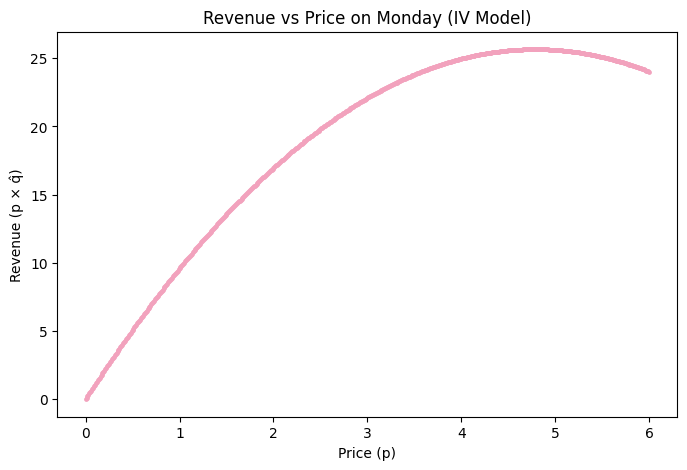

Best price: 4.79
Max revenue: 25.6616373803
Quantity at best price: 5.35733557


In [9]:
import numpy as np
import matplotlib.pyplot as plt

beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

# Monday
Mon, Tue, Wed, Thu = 1, 0, 0, 0

prices = np.arange(0, 6.01, 0.01)

q_hat = (beta0
         + beta_p * prices
         + beta_mon * Mon
         + beta_tue * Tue
         + beta_wed * Wed
         + beta_thu * Thu)

revenue = prices * q_hat

plt.figure(figsize=(8,5))

plt.scatter(
    prices,
    revenue,
    marker='o',
    s=12,
    linewidths=0,
    c='#F2A2BD'
)

plt.xlabel("Price (p)")
plt.ylabel("Revenue (p × q̂)")
plt.title("Revenue vs Price on Monday (IV Model)")
plt.show()
plt.clf()
plt.close('all')

idx_max = np.nanargmax(revenue)
print("Best price:", prices[idx_max])
print("Max revenue:", revenue[idx_max])
print("Quantity at best price:", q_hat[idx_max])



The scatter plot of revenue versus price shows a concave curve that rises and then falls with a maximum revenue of 25.662 around a price of approximately p = 4.79 on Monday. I think sellers should set their price at 4.79 on Mondays.

---

**d) Repeat this exercise for other days (Tue, Wed, and Thu).**

Tuesday:

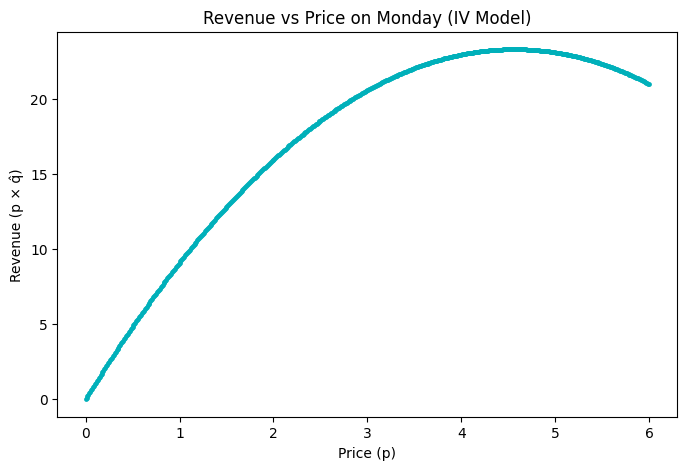

Best price: 4.5600000000000005
Max revenue: 23.299021228799997
Quantity at best price: 5.109434479999999


In [10]:
import numpy as np
import matplotlib.pyplot as plt

beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

# Monday
Mon, Tue, Wed, Thu = 0, 1, 0, 0

prices = np.arange(0, 6.01, 0.01)

q_hat = (beta0
         + beta_p * prices
         + beta_mon * Mon
         + beta_tue * Tue
         + beta_wed * Wed
         + beta_thu * Thu)

revenue = prices * q_hat

plt.figure(figsize=(8,5))

plt.scatter(
    prices,
    revenue,
    marker='o',
    s=12,
    linewidths=0,
    c='#00B0BA'
)

plt.xlabel("Price (p)")
plt.ylabel("Revenue (p × q̂)")
plt.title("Revenue vs Price on Monday (IV Model)")
plt.show()
plt.clf()
plt.close('all')

idx_max = np.nanargmax(revenue)
print("Best price:", prices[idx_max])
print("Max revenue:", revenue[idx_max])
print("Quantity at best price:", q_hat[idx_max])



The scatter plot shows a maximum revenue of 23.299 around a price of approximately p = 4.56 on Tuesday. I think sellers should set their price at 4.56 on Tuesdays.

---

Wednesdays:

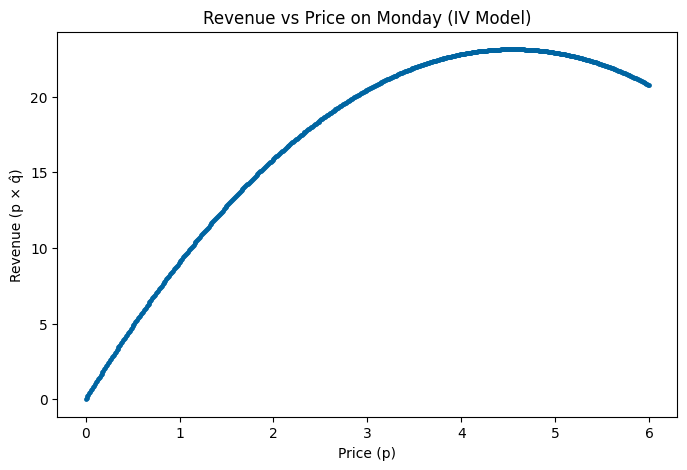

Best price: 4.55
Max revenue: 23.1369622575
Quantity at best price: 5.08504665


In [11]:
import numpy as np
import matplotlib.pyplot as plt

beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

# Monday
Mon, Tue, Wed, Thu = 0, 0, 1, 0

prices = np.arange(0, 6.01, 0.01)

q_hat = (beta0
         + beta_p * prices
         + beta_mon * Mon
         + beta_tue * Tue
         + beta_wed * Wed
         + beta_thu * Thu)

revenue = prices * q_hat

plt.figure(figsize=(8,5))

plt.scatter(
    prices,
    revenue,
    marker='o',
    s=12,
    linewidths=0,
    c='#0065A2'
)

plt.xlabel("Price (p)")
plt.ylabel("Revenue (p × q̂)")
plt.title("Revenue vs Price on Monday (IV Model)")
plt.show()
plt.clf()
plt.close('all')

idx_max = np.nanargmax(revenue)
print("Best price:", prices[idx_max])
print("Max revenue:", revenue[idx_max])
print("Quantity at best price:", q_hat[idx_max])


The scatter plot shows a maximum revenue of 23.137 around a price of approximately p = 4.55 on Wednesday. I think sellers should set their price at 4.55 on Wednesdays.

---

Thursdays:

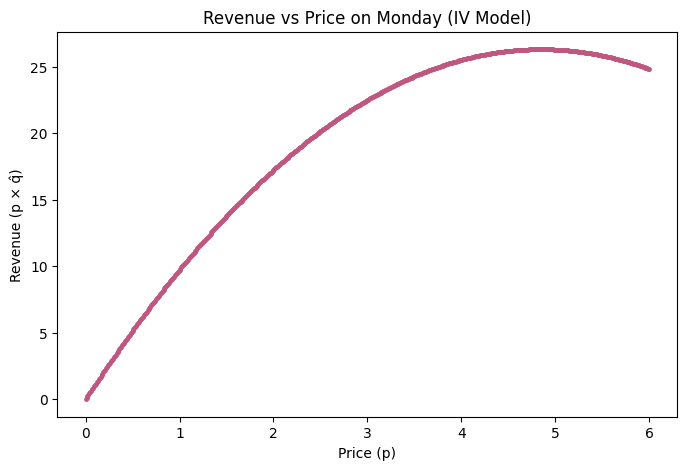

Best price: 4.8500000000000005
Max revenue: 26.310471817499998
Quantity at best price: 5.424839549999999


In [12]:
import numpy as np
import matplotlib.pyplot as plt

beta0 = 10.744745
beta_p = -1.119417
beta_mon = -0.025402
beta_tue = -0.530769
beta_wed = -0.566351
beta_thu = 0.109267

# Monday
Mon, Tue, Wed, Thu = 0, 0, 0, 1

prices = np.arange(0, 6.01, 0.01)

q_hat = (beta0
         + beta_p * prices
         + beta_mon * Mon
         + beta_tue * Tue
         + beta_wed * Wed
         + beta_thu * Thu)

revenue = prices * q_hat

plt.figure(figsize=(8,5))

plt.scatter(
    prices,
    revenue,
    marker='o',
    s=12,
    linewidths=0,
    c='#C05780'
)

plt.xlabel("Price (p)")
plt.ylabel("Revenue (p × q̂)")
plt.title("Revenue vs Price on Monday (IV Model)")
plt.show()
plt.clf()
plt.close('all')

idx_max = np.nanargmax(revenue)
print("Best price:", prices[idx_max])
print("Max revenue:", revenue[idx_max])
print("Quantity at best price:", q_hat[idx_max])

The scatter plot shows a maximum revenue of 26.310 around a price of approximately p = 4.85 on Thursday. I think sellers should set their price at 4.85 on Thursdays.

---